### Objective:#### 
The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively


### Dataset
#### 1.	LB - Likely stands for "Baseline Fetal Heart Rate (FHR)" which represents the average fetal heart rate over a period.
#### 2.	AC - Could represent "Accelerations" in the FHR. Accelerations are usually a sign of fetal well-being.
#### 3.	FM - May indicate "Fetal Movements" detected by the monitor.
#### 4.	UC - Likely denotes "Uterine Contractions", which can impact the FHR pattern.
#### 5.	DL - Could stand for "Decelerations Late" with respect to uterine contractions, which can be a sign of fetal distress.
#### 6.	DS - May represent "Decelerations Short" or decelerations of brief duration.
#### 7.	DP - Could indicate "Decelerations Prolonged", or long-lasting decelerations.
#### 8.	ASTV - Might refer to "Percentage of Time with Abnormal Short Term Variability" in the FHR.
#### 9.	MSTV - Likely stands for "Mean Value of Short Term Variability" in the FHR.
#### 10.	ALTV - Could represent "Percentage of Time with Abnormal Long Term Variability" in the FHR.
#### 11.	MLTV - Might indicate "Mean Value of Long Term Variability" in the FHR.n the FHR.


### Tools and Libraries:alysis


#### ●	Python or R programming language
#### ●	Data manipulation libraries 
#### ●	Data visualization libraries (Matplotlib and Seaborn in Pytho#)
#### ●	Jupyter Notebook for documenting your anal

## Tasks:

### 1.	Data Cleaning and Preparation:ry.


#### ●	Load the dataset into a DataFrame or equivalent data structure.
#### ●	Handle missing values appropriately (e.g., imputation, deletion).
#### ●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
#### ●	Detect and treat outliers if necessary.

### loading the dataset and inspecting its structure

In [26]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load the dataset
card = pd.read_csv('Cardiotocographic.csv')

# Display the first few rows of the dataset
card.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [28]:
# Check for missing values
card.isnull().sum()

# Handle missing values (for simplicity, we'll use mean imputation for numerical variables)
card.fillna(card.mean(), inplace=True)

In [29]:
# Check data types
card.dtypes

# Convert any necessary columns to appropriate data types (if required)
# For example, if any numerical columns are stored as strings
card['LB'] = pd.to_numeric(card['LB'], errors='coerce')


In [30]:
# Using Z-score to detect outliers
z_scores = np.abs(stats.zscore(card.select_dtypes(include=[np.number])))
outliers = np.where(z_scores > 3)
card = card[(z_scores < 3).all(axis=1)]

## Step 2: Statistical Summary

In [31]:
# Statistical summary
summary = card.describe()

# Additional measures of central tendency and dispersion
median = card.median()
iqr = card.quantile(0.75) - card.quantile(0.25)

summary, median, iqr

(                LB           AC           FM           UC           DL  \
 count  1869.000000  1869.000000  1869.000000  1869.000000  1869.000000   
 mean    133.306955     0.003194     0.004240     0.004391     0.001732   
 std       9.899631     0.003767     0.013554     0.002904     0.002705   
 min     106.000000    -0.000185    -0.005106    -0.000132    -0.000124   
 25%     126.000000     0.000000     0.000000     0.002002     0.000000   
 50%     133.000000     0.001733     0.000000     0.004556     0.000000   
 75%     141.000000     0.005650     0.002358     0.006579     0.003036   
 max     160.000000     0.016000     0.189320     0.013861     0.011837   
 
                  DS           DP         ASTV         MSTV         ALTV  \
 count  1.869000e+03  1869.000000  1869.000000  1869.000000  1869.000000   
 mean   3.736781e-08     0.000102    46.870868     1.283173     9.193894   
 std    6.367633e-07     0.000404    16.834525     0.778099    16.574763   
 min   -6.650000e-0

In [50]:
# Step 1: Calculate Q1 and Q3
Q1 = np.percentile(card, 25)
Q3 = np.percentile(card, 75)

# Step 2: Compute the IQR
IQR = Q3 - Q1

# Step 3: Determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Identify outliers
outliers = card[(card < lower_bound) | (card > upper_bound)]

# Step 5: Calculate the sum of outliers
sum_of_outliers = np.sum(outliers)

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Sum of Outliers: {sum_of_outliers}")


Q1: 0.0
Q3: 10.8
IQR: 10.8
Lower Bound: -16.200000000000003
Upper Bound: 27.000000000000004
Sum of Outliers: LB          249150.699286
AC               0.000000
FM               0.000000
UC               0.000000
DL               0.000000
DS               0.000000
DP               0.000000
ASTV         80324.696674
MSTV             0.000000
ALTV         11912.647312
MLTV           310.100000
Width       122957.600299
Tendency         0.000000
NSP              0.000000
dtype: float64


### Step 3: Data Visualization
#### Histograms and Boxplots

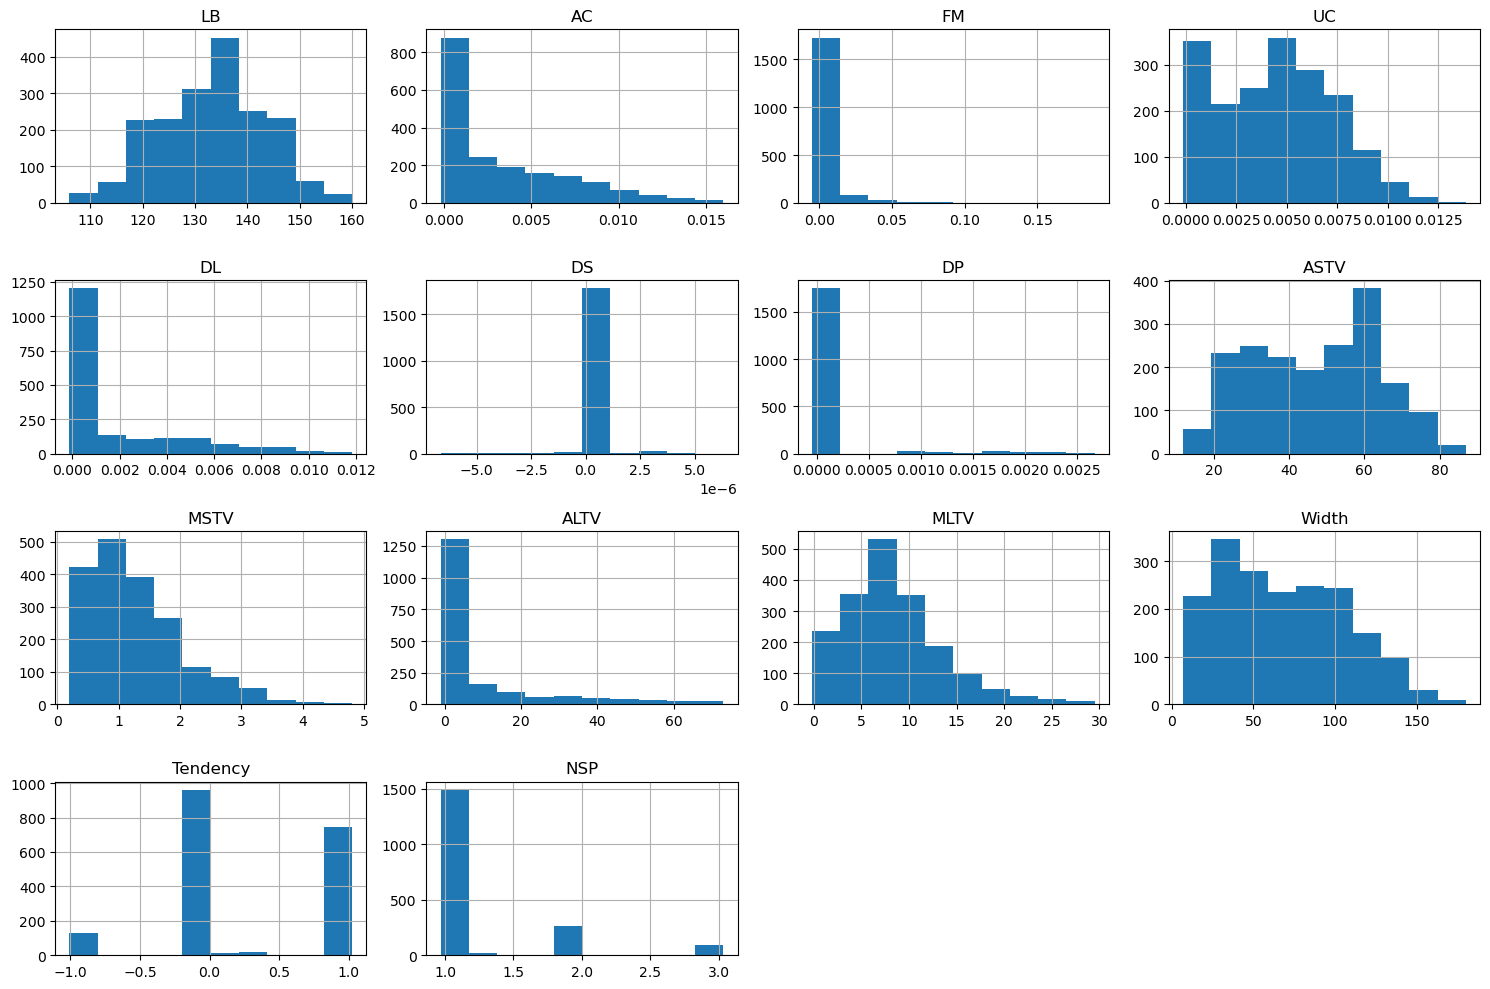

In [32]:
# Histograms
card.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

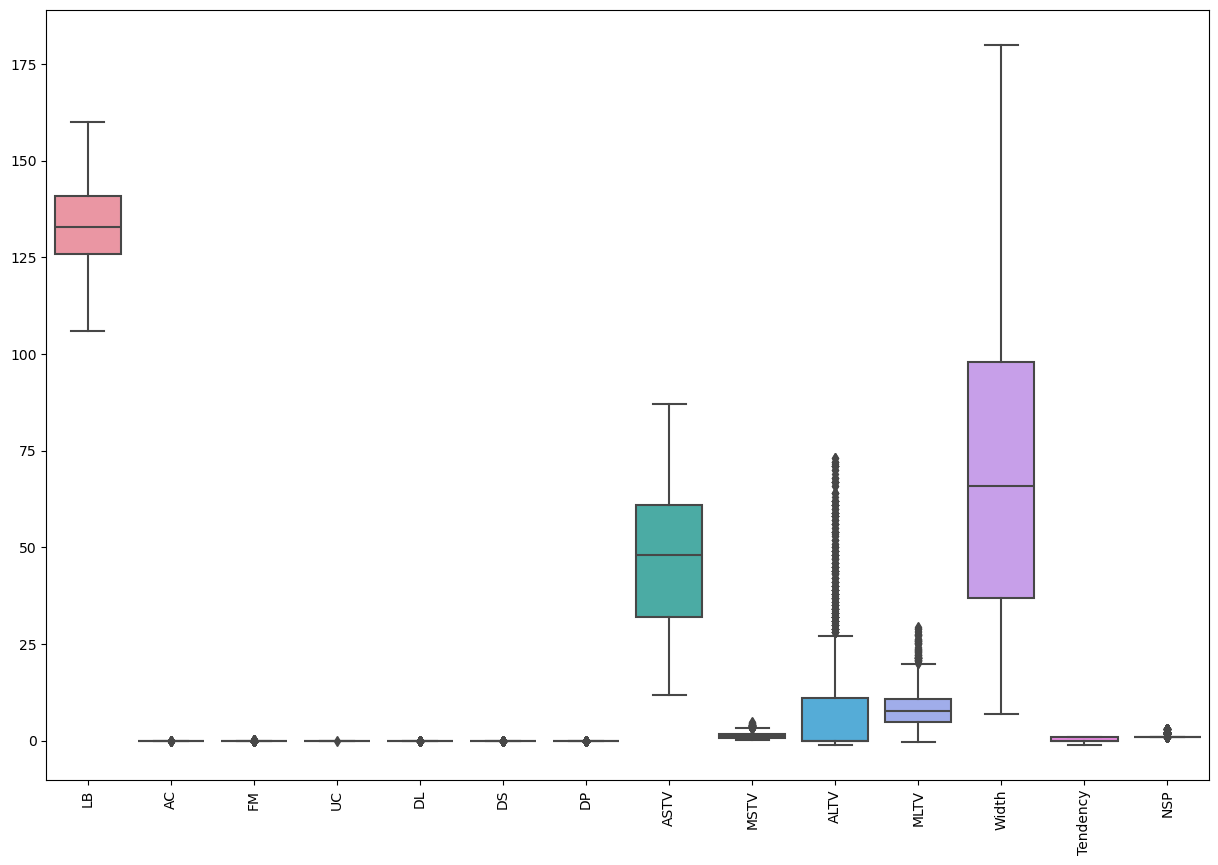

In [33]:
# Boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=card)
plt.xticks(rotation=90)
plt.show()

#### Bar Charts or Pie Charts for Categorical Variables

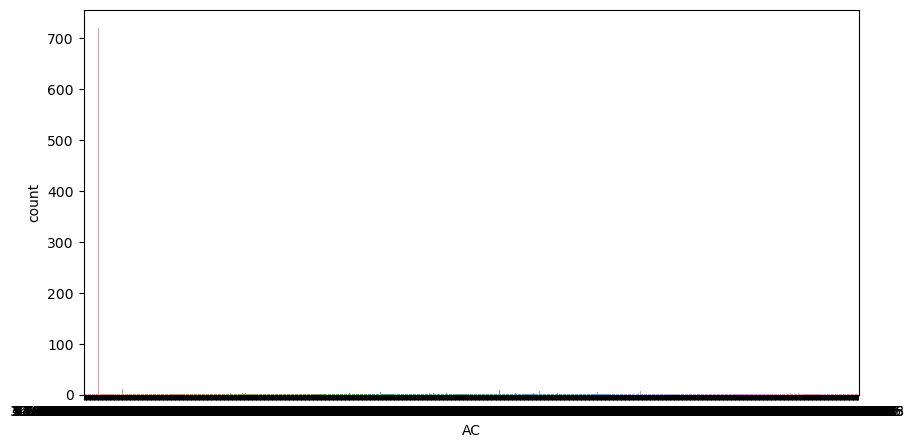

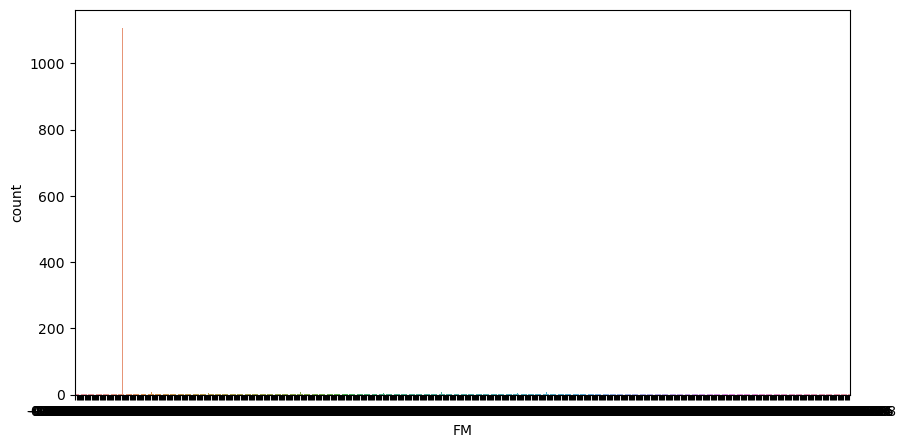

In [34]:
# Assuming there are categorical variables to plot
# Example bar chart (if there are categorical variables)
categorical_columns = ['AC', 'FM']  # Modify based on actual categorical columns in the dataset

for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=card)
    plt.show()

### Scatter Plots and Correlation Heatmaps

In [35]:
import warnings
warnings.filterwarnings("ignore")

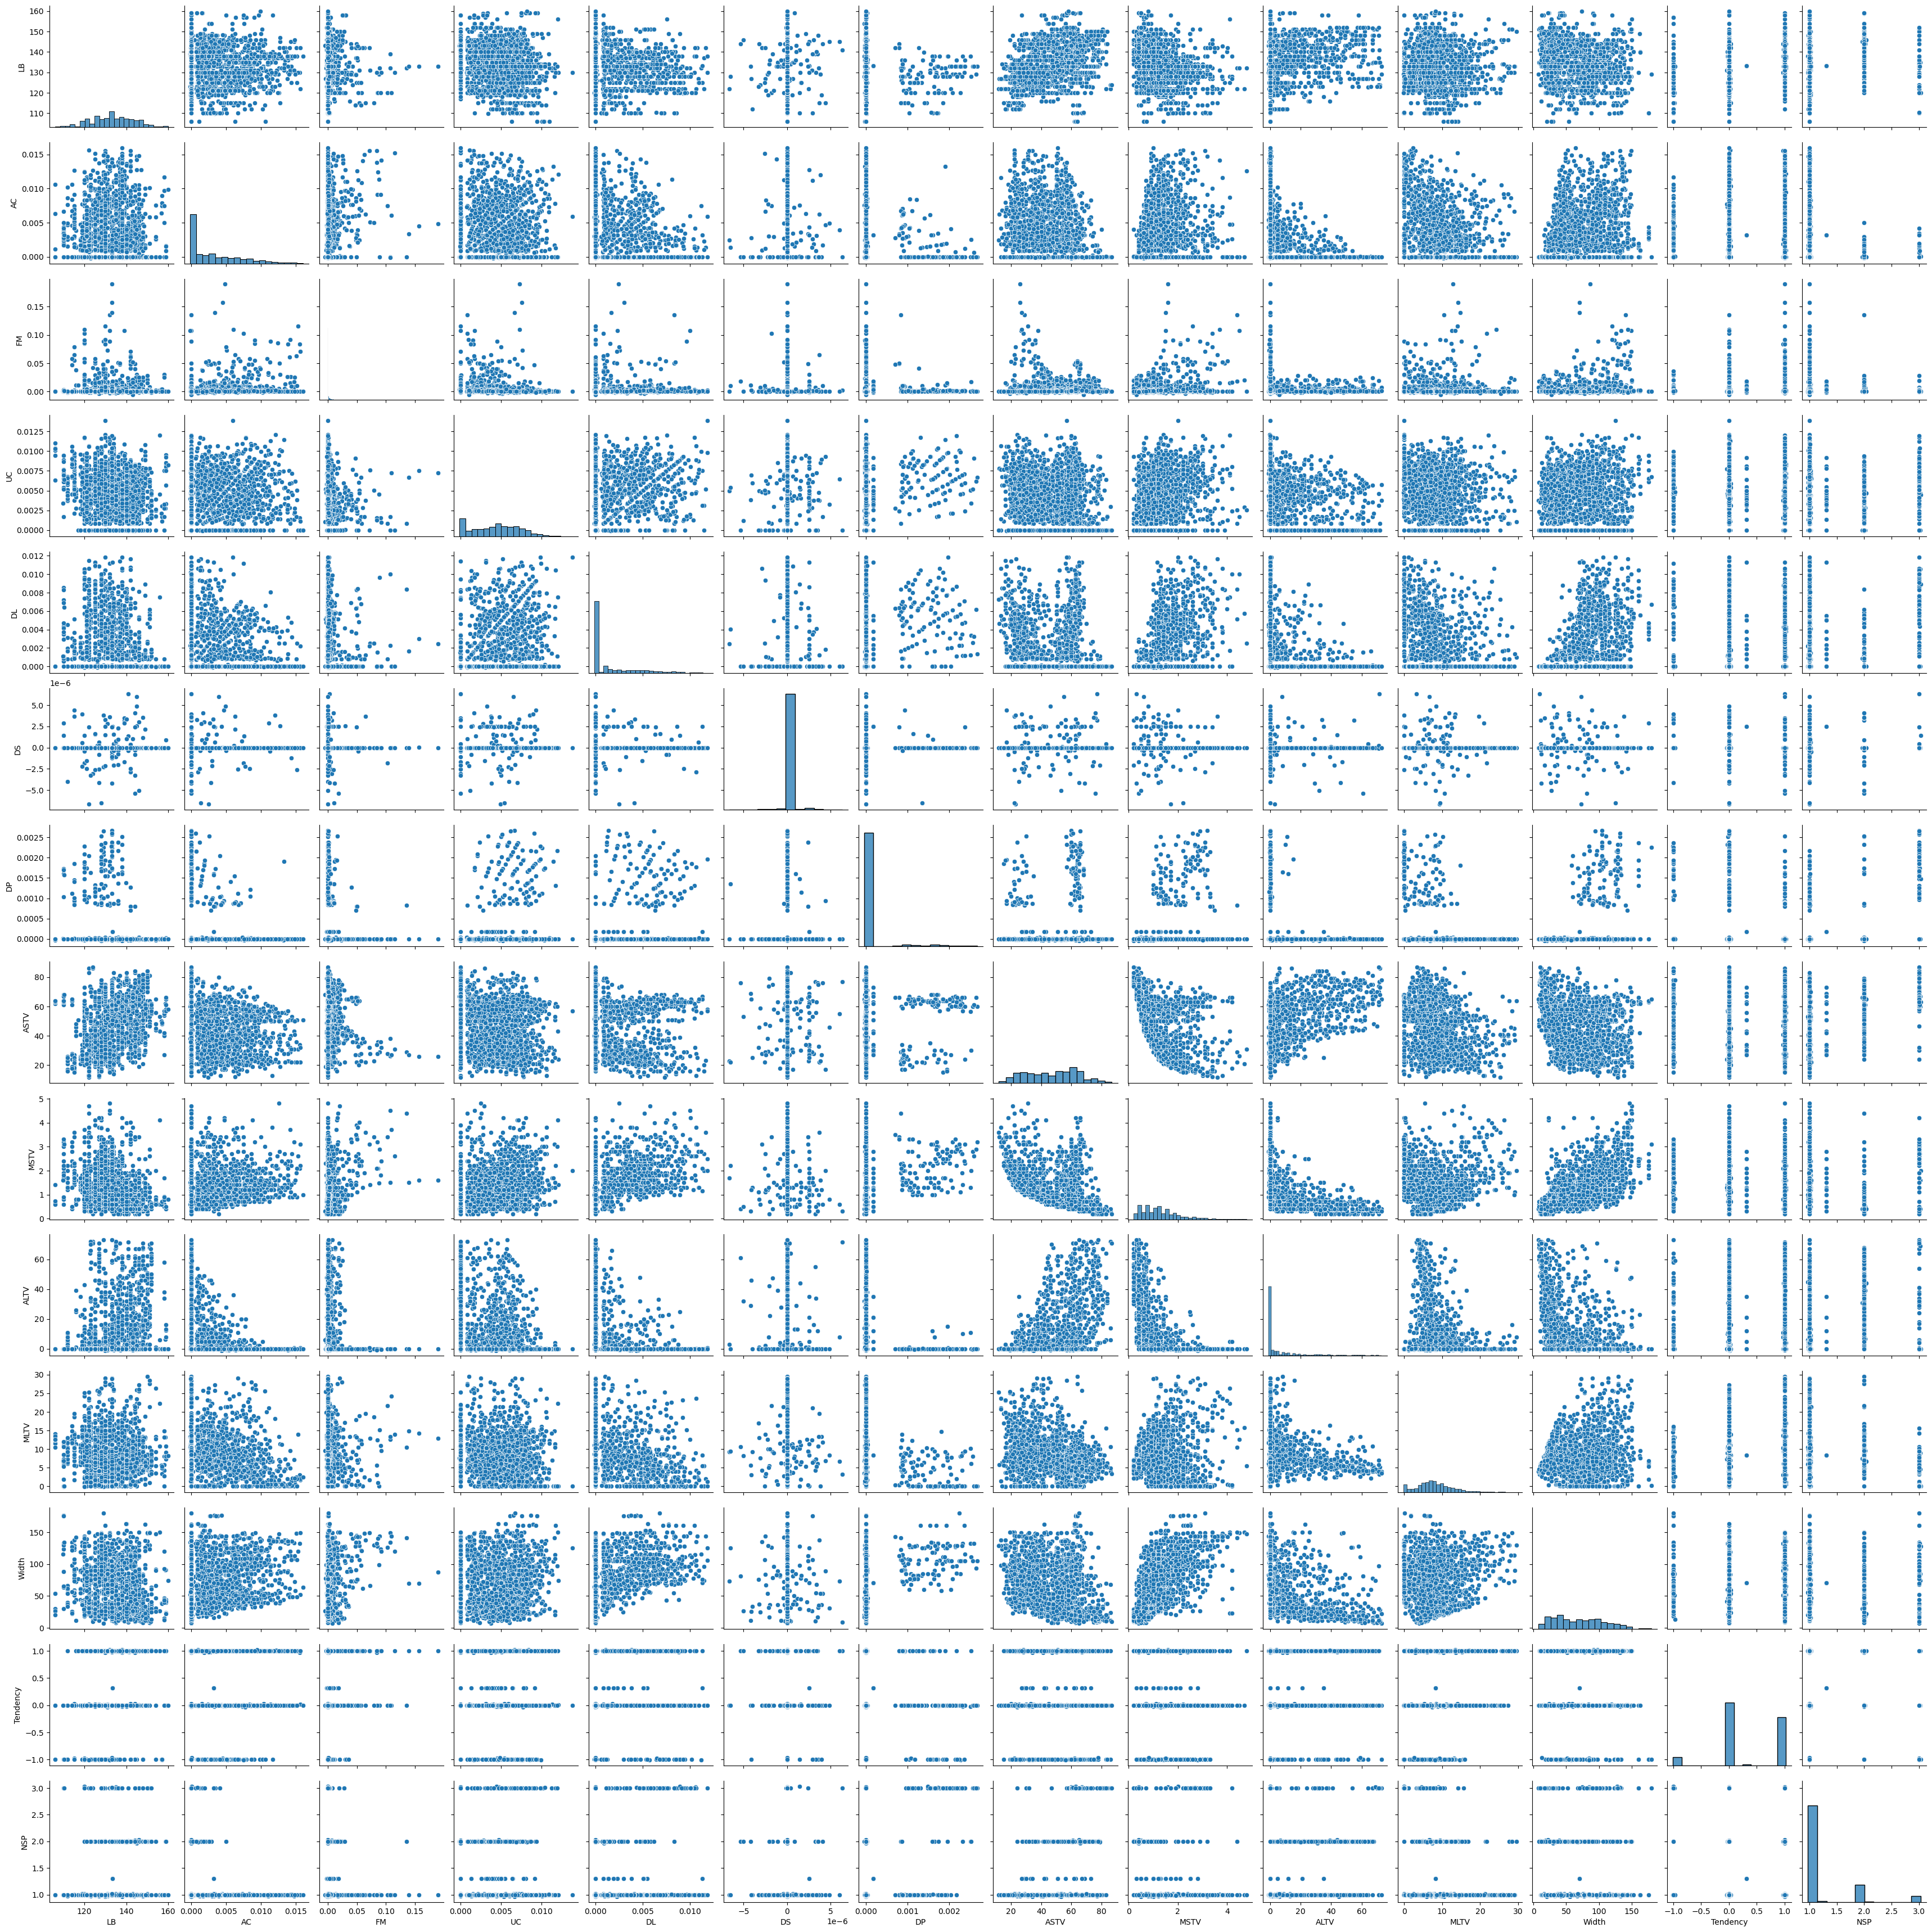

In [36]:
# Scatter plots
sns.pairplot(card)
plt.show()

In [51]:
card.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.086515,-0.042026,-0.160873,-0.142814,0.027850,-0.129591,0.317221,-0.310561,0.303701,-0.050824,-0.145620,0.294301,0.195863
AC,-0.086515,1.000000,0.169733,0.080760,-0.097089,0.010686,-0.126544,-0.274809,0.231367,-0.390056,-0.167508,0.315573,0.014916,-0.355865
FM,-0.042026,0.169733,1.000000,-0.158045,0.002855,-0.006777,-0.015265,-0.041502,0.206354,-0.062675,0.033019,0.196064,0.057996,-0.033463
UC,-0.160873,0.080760,-0.158045,1.000000,0.276618,0.030565,0.177230,-0.203468,0.279822,-0.285765,-0.079630,0.118759,-0.096481,-0.192304
DL,-0.142814,-0.097089,0.002855,0.276618,1.000000,-0.002720,0.310766,-0.108810,0.563550,-0.271666,-0.212914,0.517190,0.070314,0.015705
DS,0.027850,0.010686,-0.006777,0.030565,-0.002720,1.000000,0.019256,0.028931,-0.006152,-0.026933,-0.009254,-0.011315,-0.017551,0.022072
DP,-0.129591,-0.126544,-0.015265,0.177230,0.310766,0.019256,1.000000,0.065640,0.288974,-0.129843,-0.225322,0.257677,-0.148654,0.434783
ASTV,0.317221,-0.274809,-0.041502,-0.203468,-0.108810,0.028931,0.065640,1.000000,-0.420823,0.436725,-0.321843,-0.225004,0.002699,0.471407
MSTV,-0.310561,0.231367,0.206354,0.279822,0.563550,-0.006152,0.288974,-0.420823,1.000000,-0.488712,0.061187,0.642640,-0.034135,-0.146029
ALTV,0.303701,-0.390056,-0.062675,-0.285765,-0.271666,-0.026933,-0.129843,0.436725,-0.488712,1.000000,-0.164896,-0.418816,0.032804,0.414355


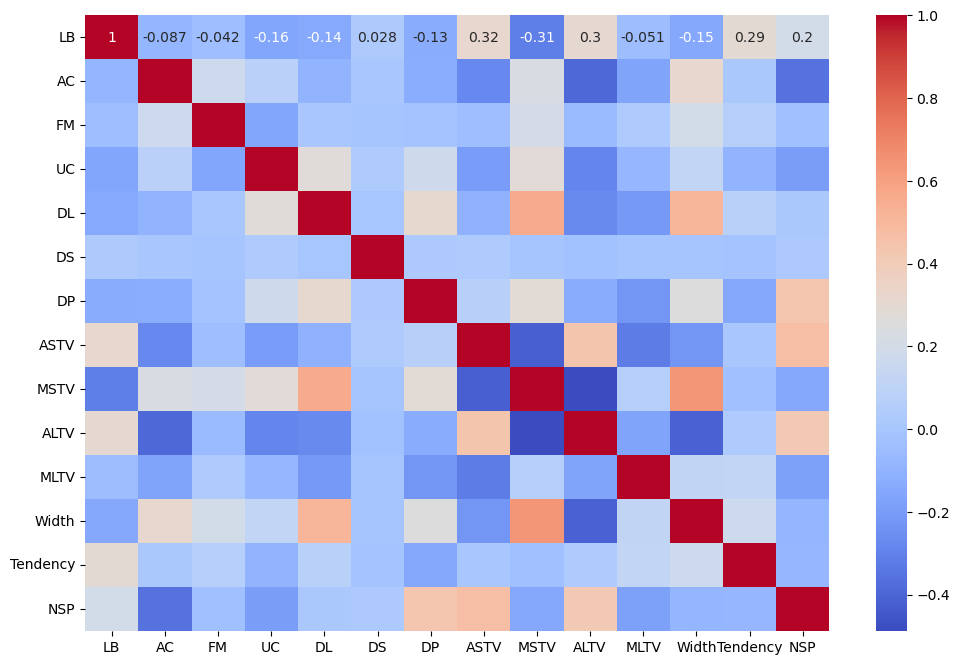

In [37]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(card.corr(), annot=True, cmap='coolwarm')
plt.show()

### Advanced Visualization Techniques

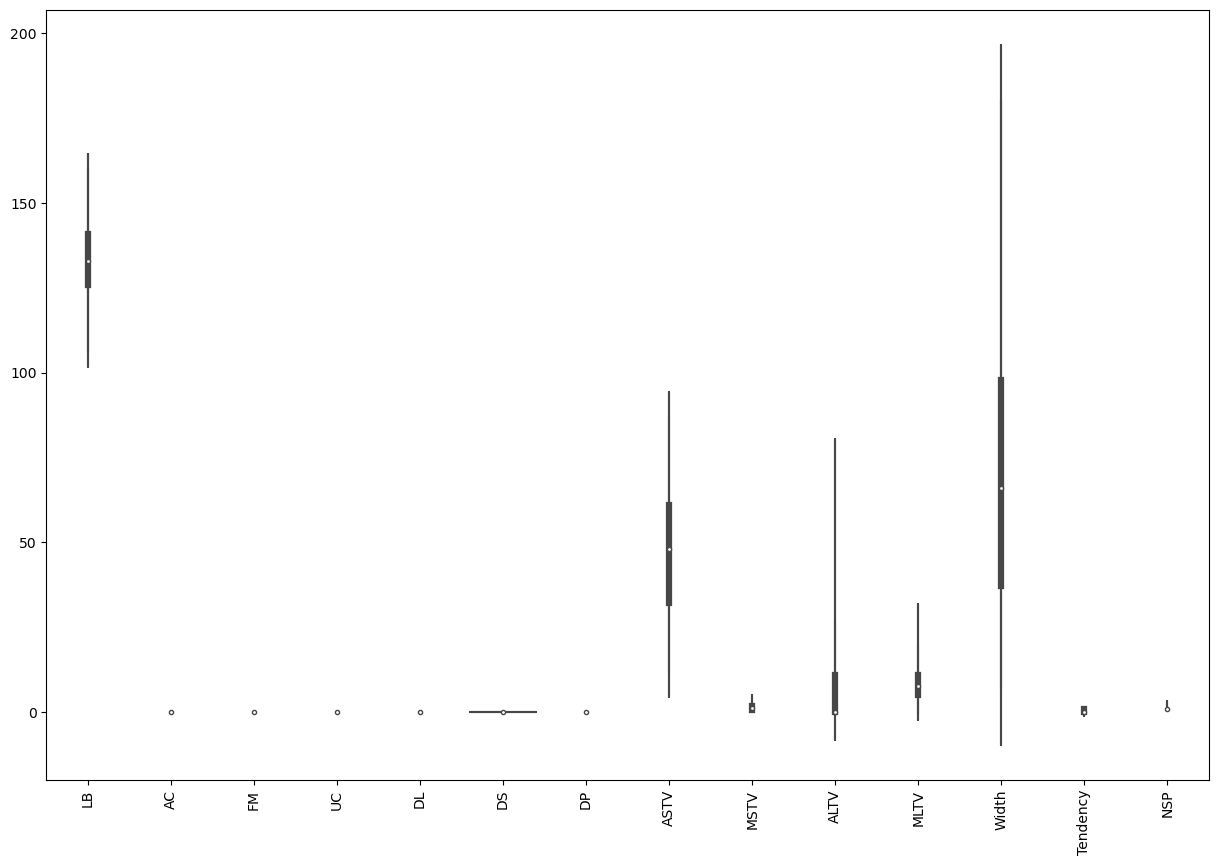

In [38]:
# Violin plots
plt.figure(figsize=(15, 10))
sns.violinplot(data=card)
plt.xticks(rotation=90)
plt.show()

### Step 4: Pattern Recognition and Insights

#### Identifying Correlations

In [39]:
# Correlation matrix
correlation_matrix = card.corr()

# Displaying highly correlated pairs
high_corr = correlation_matrix[correlation_matrix.abs() > 0.7]
high_corr

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AC,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FM,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UC,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DL,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
MSTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
ALTV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


### Step 5: Conclusion

In [52]:
# Insights
print("\nInsights from Visualizations:")
print("1. Histograms show that the data is not normally distributed and is more skewed.")
print("2. Boxplots indicate the presence of outliers in columns like LB, ASTV, ALTV, MLTV, and Width.")
print("3. Scatter plots reveal that some columns have no clear relationship with others.")
print("4. Correlation heatmap shows weak relationships in columns with lighter colors.")


Insights from Visualizations:
1. Histograms show that the data is not normally distributed and is more skewed.
2. Boxplots indicate the presence of outliers in columns like LB, ASTV, ALTV, MLTV, and Width.
3. Scatter plots reveal that some columns have no clear relationship with others.
4. Correlation heatmap shows weak relationships in columns with lighter colors.


### Key Insights and Patterns

#### 1. Central Tendencies:

###### The mean and median of LB (Baseline Fetal Heart Rate) are close (133.31 and 133, respectively), indicating a symmetric distribution for this variable.
###### Variables like FM (Fetal Movements) and UC (Uterine Contractions) have means slightly higher than their medians, suggesting a possible right-skewed distribution.
#### 2. Dispersions:

###### The standard deviation of ASTV (Percentage of Time with Abnormal Short Term Variability) is relatively high (16.83), indicating considerable variability.
###### Variables like DS (Decelerations Short) and DP (Decelerations Prolonged) have very low standard deviations, indicating low variability.
#### 3. Distribution and Outliers:

###### Histograms indicate that the data is not normally distributed and is more skewed.
###### Boxplots reveal the presence of outliers in columns such as LB, ASTV, ALTV, MLTV, and Width.
#### 4. Relationships Between Variables:

###### Scatter plots show that some variables have no clear relationship with others.
###### The correlation heatmap indicates weak relationships in columns with lighter colors, suggesting minimal correlation.

### Impact on Decision-Making and Further Analyses

#### 1. Understanding Data Distribution:

###### Recognizing that the data is skewed and not normally distributed helps in choosing appropriate statistical methods for further analysis. For instance, non-parametric tests might be more suitable than parametric tests that assume normality.
#### 2. Handling Outliers:

###### The presence of outliers in several columns, as indicated by the boxplots, suggests a need for careful handling. Outliers can significantly impact the results of analyses, so decisions need to be made on whether to remove them, transform them, or use robust statistical methods that are less sensitive to outliers.
#### 3. Variable Relationships:

###### The weak relationships between many variables, as shown by the correlation heatmap, indicate that multicollinearity might not be a major issue. However, it also suggests that building predictive models might require more sophisticated techniques such as ensemble methods or feature engineering to improve performance.
#### 4. Focus Areas for Further Research:

###### High variability in variables like ASTV suggests areas for deeper investigation. Understanding what drives this variability could be crucial for insights into fetal health.
###### The low variability in variables like DS and DP might indicate consistent patterns or measurements, which could be beneficial in creating stable predictive models.
#### 5. Informing Stakeholders:

###### These insights can be communicated to stakeholders to set expectations about the data quality and distribution. This is particularly important for medical research, where understanding data characteristics can influence clinical decision-making and policy development.
#### 6. Data Preprocessing Steps:

###### These findings highlight the importance of data preprocessing steps such as normalization or transformation for skewed data, and robust methods to handle outliers before proceeding with advanced analyses or machine learning models.